<center><img src="http://milestonetechs.com/media/filer_public_thumbnails/filer_public/24/26/24260fc4-2637-4348-b2bd-3c333f2f806d/python_logo.jpg__800x250_q85_crop_subsampling-2.jpg" width="1000"></center>

# Programa de Especialización en Python

## Tema: Árboles de Decisión

### Prof. Manuel Sigüeñas, M.Sc.(c)
[msguenas@socialdata-peru.com](msguenas@socialdata-peru.com)

### Librerías Necesarias.

In [ ]:
#pip install sklearn

In [ ]:
#pip install subprocess.run

In [36]:
#pip install pyparsing
#!pip install pygraphviz 

In [33]:
!pip install graphviz

In [ ]:
#pip install pydot

In [ ]:
#pip install mlxtend

In [ ]:
#pip install pydotplus

# Cargar y Preprocesar la data

Para este caso usaremos la data diabetes.

In [2]:
import numpy as np
import pandas as pd

- Usamos la función read_excel para abrir el archivo "diabetes_py".

In [3]:
bu = pd.read_excel('C:/Users/SOCIAL DATA/Dropbox/PYTHON/3. avanzado/sesión_01/datos/diabetes_py.xlsx')

- Muestra de las 5 primeras muestras de la data

In [4]:
bu.head()

,clase,glucosa,insulina,sspg
0,1,97,289,117
1,1,105,319,143
2,1,90,356,199
3,1,90,323,240
4,1,86,381,157


- Valores únicos de la variable target

In [5]:
import numpy as np
print('class labels', np.unique(bu.iloc[:,0])) #  usamos la función uniquwe, de la librería numpy, para encontrar 
                                               #  los valores únicos de la variable target. bu.iloc, lo usamos para selec-
                                               #  cionar la variables target de la data bupa, en este caso ubicado en la 
                                               #  primera columna
### clase 1 = normal
### clase 2 = pre-diabetico
### clase 3 = diabetico

class labels [1 2 3]


- Separamos la data, una de entrenamiento y otra de prueba.
- También, para esta parte, solo usaremos dos variables, glucosa e insulina. 

In [6]:
from sklearn.model_selection import train_test_split
x, y = bu.iloc[:, 1:4].values, bu.iloc[:, 0].values  ## separamos las variables predictoras (glucosa, insulina[:,1:3]) y la variable dependiente
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.3, ### separamos en 4 objetos las variables, dos seran de prueba y dos de entrenamiento
                        stratify=y)   ### le damos el 30% a la dara de prueba
## usamos la función model_selection, de la librería sklearn
## Para este caso, también solo se usara

# Árbol de Decisión

- Los árboles de decisión pueden generar límites de decisión complejos dividiendo las caracteríticas en rectangulos. Sin embargo, debemos con cuidado puesto que cuanto más profundo es es el árbol de decisión, más complejo es el límite de decisión, el cual puede caer más facilmente en el sobreajuste. 

Entrenamos un árbol de decisión con una profundidad máxima de 3, utilizando la entropía como criterio para la impureza.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

In [10]:
from sklearn.model_selection import train_test_split
x, y = bu.iloc[:, 1:3].values, bu.iloc[:, 0].values  ## separamos las variables predictoras (glucosa, insulina[:,1:3]) y la variable dependiente
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split (x, y, test_size=0.3, ### separamos en 4 objetos las variables, dos seran de prueba y dos de entrenamiento
                        stratify=y)   ### le damos el 30% a la dara de prueba
## usamos la función model_selection, de la librería sklearn
## Para este caso, también solo se usara

In [8]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=99)
#max_depth = 4, random_state=1
## almacenar en el objeto tree = la función DecisionTreeClassifier

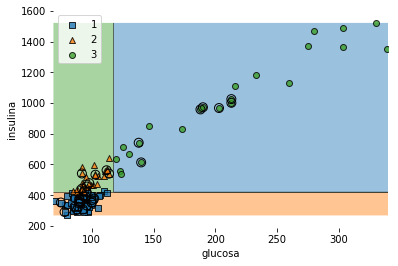

DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION

Precisión del modelo:
0.9875


In [11]:
tree.fit(X_TRAIN, Y_TRAIN) ## Usamos la data de entrenamiento para crear el árbol
x_combined= np.vstack((X_TRAIN, X_TEST)) ## Combinamos las variables x
y_combined= np.hstack((Y_TRAIN, Y_TEST)) ## Combinamos las varialbes y 
plot_decision_regions(x_combined, y_combined, clf=tree, X_highlight=X_TEST) ## Gráficamos el árbol en base a áreas, con la función "plot_decision_regions"
plt.xlabel('glucosa') ## asignamos el nombre al eje x
plt.ylabel('insulina')## asignamos el nombre al eje y
plt.legend(loc='upper left')## posición de la leyenda
plt.show() ##gráficamos


print('DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION')
print()
print('Precisión del modelo:')
print(tree.score(X_TRAIN, Y_TRAIN))

### Graficar el Árbol

- Scikit-learn nos permite exportar el árbol en un archivo .dot, que podemos visualizar con el programa GraphViz.

In [37]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets as datasets
import graphviz
#import pygraphviz 
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from subprocess import check_call

In [13]:
#Datos de entrenamiento
x_t= pd.DataFrame(x_train, columns=["glucosa", "insulina", "sspg"])
y_t= pd.DataFrame(y_train, columns=["clase"])

bupa_entrenamiento = pd.concat([x_t, y_t], axis=1)
bupa_entrenamiento.head()

,glucosa,insulina,sspg,clase
0,138,741,219,3
1,100,398,122,1
2,86,381,157,1
3,103,537,622,2
4,93,364,156,1


In [14]:
colnames = bupa_entrenamiento.columns.tolist()
predictors = colnames[0:3]
target = colnames[3]

In [15]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=99)

In [16]:
tree_fit =tree.fit(x_train, y_train) ## Usamos la data de entrenamiento para crear el árbol

In [17]:
with open("bupa_dtree.dot", "w") as dotfile:
    export_graphviz(tree_fit, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [38]:
import os
from graphviz import Source

In [49]:
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Lib/site-packages/graphviz/__pycache__'

In [50]:
file = open("bupa_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="insulina <= 420.5\\nentropy = 1.408\\nsamples = 80\\nvalue = [46, 18, 16]"] ;\n1 [label="entropy = 0.0\\nsamples = 45\\nvalue = [45, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="glucosa <= 117.0\\nentropy = 1.156\\nsamples = 35\\nvalue = [1, 18, 16]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.297\\nsamples = 19\\nvalue = [1, 18, 0]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 16\\nvalue = [0, 0, 16]"] ;\n2 -> 4 ;\n}'

In [1]:
#Source(text)

### Validación del modelo

##### accuracy 

In [52]:
#entrenamiento 
tree.score(x_train, y_train)

0.9875

In [124]:
probs = tree_fit.predict(x_train)
probs

array([3, 2, 3, 1, 1, 1, 1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 3, 1,
       3, 3, 3, 1, 2, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 3, 1, 1, 3, 1, 2, 2, 1, 1, 1, 3, 2, 2, 3, 2, 2, 1, 3,
       1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [56]:
probs2 = tree_fit.predict(x_test)
probs2

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2,
       1, 3, 1, 1, 1, 2, 2, 1, 3, 3, 2, 2, 3], dtype=int64)

In [54]:
from sklearn import metrics

In [57]:
metrics.accuracy_score(y_test, probs2)

1.0